In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/HandlingMissingValue.csv')

In [5]:
df.shape

(3554, 18)

In [6]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
train_df = df.drop(columns=['society','price_per_sqft']) #We removed the price_per_sqft ...highly correalted with price

In [9]:
train_df.columns

Index(['property_type', 'sector', 'price', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'agePossession', 'built_up_area', 'study room',
       'servant room', 'store room', 'pooja room', 'others', 'furnishing_type',
       'luxury_score'],
      dtype='object')

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3554 non-null   object 
 1   sector           3554 non-null   object 
 2   price            3554 non-null   float64
 3   bedRoom          3554 non-null   int64  
 4   bathroom         3554 non-null   int64  
 5   balcony          3554 non-null   object 
 6   floorNum         3554 non-null   float64
 7   agePossession    3554 non-null   object 
 8   built_up_area    3554 non-null   float64
 9   study room       3554 non-null   int64  
 10  servant room     3554 non-null   int64  
 11  store room       3554 non-null   int64  
 12  pooja room       3554 non-null   int64  
 13  others           3554 non-null   int64  
 14  furnishing_type  3554 non-null   int64  
 15  luxury_score     3554 non-null   int64  
dtypes: float64(3), int64(9), object(4)
memory usage: 444.4+ KB


In [11]:
plot_df = train_df.select_dtypes(include=['int','float'])

<Axes: >

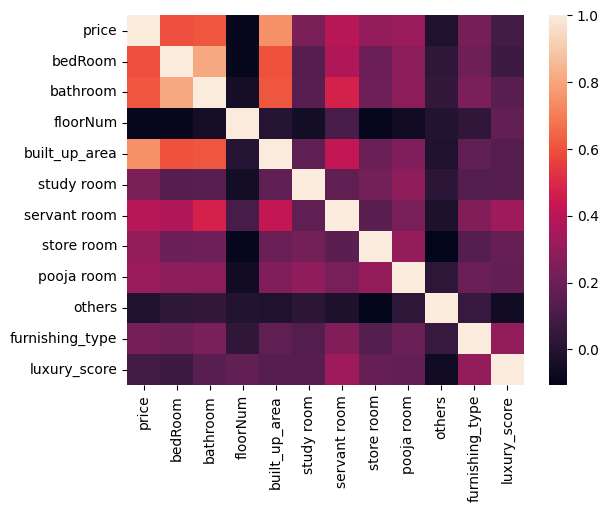

In [12]:
sns.heatmap(plot_df.corr())

In [13]:
plot_df.corr()['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.746323
bathroom           0.609777
bedRoom            0.591289
servant room       0.391930
pooja room         0.319852
store room         0.305677
study room         0.242955
furnishing_type    0.225625
luxury_score       0.091473
others            -0.013064
floorNum          -0.087442
Name: price, dtype: float64

Price will be our output column , this correlation shows us that how other variables are related to price .
For Numerical Column - others and floorNum are no correlated to Price.
For Categorical Columns - We can't find correlation but now we are assuming that property type , agepossession and sector is important to predict price , as during eda process we find out insights that clearly indicates that these 3 factors are important in predicting price of a house/Flat..


Categorizing Luxury Score

In [14]:
train_df['luxury_score'].sample(5)

1773     23
1552     28
1371    100
1195     30
1970      6
Name: luxury_score, dtype: int64

In [15]:
def luxury_cat(x):
  if x>=0 and x<=50:
    return 'Low'
  elif x>=50 and x<150:
    return 'Medium'
  elif x>=150 and x<=175:
    return 'High'
  else:
    return None


In [16]:
train_df['luxury_category'] = train_df['luxury_score'].apply(luxury_cat)

In [17]:
train_df.sample(5)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
1188,flat,sector 77,2.10,3,3,3,17.0,New Property,1824.0,1,1,0,0,0,0,8,Low
3493,flat,sector 104,1.85,3,4,3+,14.0,Relatively New,2063.0,1,1,1,1,0,0,117,Medium
2135,flat,sector 85,2.60,3,3,3,17.0,Under Construction,2129.0,0,1,0,0,0,0,44,Low
2524,flat,gwal pahari,0.95,3,3,3,13.0,Old Property,1818.0,0,0,0,0,0,0,37,Low
2421,flat,sector 4,0.36,2,2,1,4.0,Relatively New,1080.0,0,0,0,0,0,0,0,Low


Categorizing Floor Num

In [18]:
train_df['floorNum'].sample(5)

457      3.0
2856    10.0
3548     1.0
2105     8.0
2439     2.0
Name: floorNum, dtype: float64

In [19]:
def floor_cat(floor):
  if floor >= 0 and floor <=2:
    return 'Low Floor'
  elif floor > 2 and floor <=10:
    return 'Mid Floor'
  elif floor > 10 and floor <=51:
    return 'High Floor'
  else:
    return None



In [20]:
train_df['floor_category'] = train_df['floorNum'].apply(floor_cat)

In [21]:
train_df.sample(5)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
2945,flat,sector 109,1.70,3,3,3,22.0,Relatively New,1550.0,0,0,0,0,0,0,103,Medium,High Floor
3312,flat,sector 89,0.90,2,2,2,1.0,New Property,1105.0,0,0,0,0,0,0,45,Low,Low Floor
1217,flat,sohna road,0.35,2,2,2,11.0,Relatively New,532.0,0,0,0,0,0,0,64,Medium,High Floor
2887,house,sector 43,8.25,5,6,3+,3.0,Moderately Old,2700.0,1,1,1,1,0,1,64,Medium,Mid Floor
2916,flat,sector 81,0.48,2,2,1,14.0,Relatively New,552.0,0,0,0,0,0,1,14,Low,High Floor


In [22]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [23]:
train_df.sample(2)

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
3218,flat,sector 104,2.65,4,4,3+,Relatively New,2925.0,0,1,0,0,0,1,Low,High Floor
517,flat,sector 112,3.75,3,5,3+,Relatively New,2524.0,0,1,0,0,0,1,Low,High Floor


In [24]:
train_df.shape[1]

16

In [25]:
from sklearn.preprocessing import OrdinalEncoder


data_label_encoded = train_df.copy()


categorical_col = train_df.select_dtypes(include=['object'])

for col in categorical_col:
  oe = OrdinalEncoder()
  data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])


In [26]:
data_label_encoded.sample(5)

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
3482,0.0,57.0,2.00,4,4,2.0,4.0,2072.0,0,0,0,0,0,0,1.0,2.0
15,0.0,99.0,1.55,3,4,3.0,3.0,1797.0,0,1,0,0,0,1,2.0,0.0
0,0.0,36.0,0.82,3,2,2.0,1.0,856.0,0,0,0,0,0,0,1.0,1.0
3172,1.0,39.0,8.00,10,10,4.0,3.0,3123.0,0,0,0,0,0,0,1.0,1.0
193,0.0,74.0,1.65,3,3,2.0,3.0,2216.0,1,0,0,0,0,0,2.0,2.0


In [27]:
features = data_label_encoded.drop(columns=['price'],axis=1)
label = data_label_encoded['price']

In [28]:
features.shape

(3554, 15)

In [29]:
label.shape

(3554,)

**Feature Selection**

Technique 1 - Correlation

<Axes: >

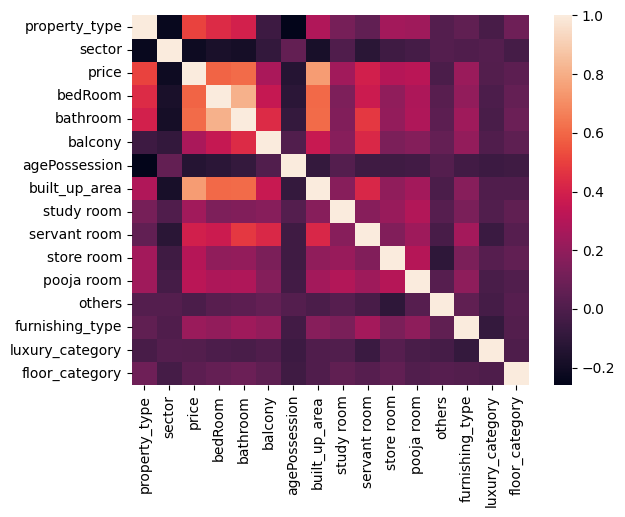

In [30]:
sns.heatmap(data_label_encoded.corr())

In [31]:
corr_Df = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_score'}).sort_values('corr_score',ascending=False)

In [32]:
corr_Df

,feature,corr_score
1,price,1.000000
6,built_up_area,0.746323
3,bathroom,0.609777
2,bedRoom,0.591289
8,servant room,0.391930
10,pooja room,0.319852
9,store room,0.305677
4,balcony,0.269637
7,study room,0.242955
12,furnishing_type,0.225625


Technique 2 - Random Forest Feature Importance

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(features,label)


rf_DF = pd.DataFrame({'feature': features.columns , 'rf_score':rf.feature_importances_}).sort_values('rf_score',ascending=False)

rf_DF



,feature,rf_score
6,built_up_area,0.644961
0,property_type,0.104743
1,sector,0.102916
3,bathroom,0.026312
2,bedRoom,0.023874
8,servant room,0.020875
5,agePossession,0.014415
4,balcony,0.012442
12,furnishing_type,0.010437
7,study room,0.008004


Technique 3 - Gradient Boosing Regression

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(features,label)


gb_DF = pd.DataFrame({'feature': features.columns , 'gb_score':gb.feature_importances_}).sort_values('gb_score',ascending=False)

gb_DF

,feature,gb_score
6,built_up_area,0.674182
1,sector,0.100749
0,property_type,0.099849
2,bedRoom,0.039491
3,bathroom,0.036856
8,servant room,0.025316
9,store room,0.008245
5,agePossession,0.005934
7,study room,0.003941
12,furnishing_type,0.003640


Technique 4 - Permutation Method

In [35]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(features, label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': features.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.737648
0,property_type,0.210292
1,sector,0.169874
2,bedRoom,0.025446
3,bathroom,0.023165
8,servant room,0.020847
5,agePossession,0.004905
13,luxury_category,0.001727
14,floor_category,0.001125
4,balcony,0.001016


Technique 5 - Lasso

In [36]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': features.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.500133
0,property_type,0.718374
3,bathroom,0.277918
9,store room,0.200064
7,study room,0.171730
8,servant room,0.163056
12,furnishing_type,0.162958
10,pooja room,0.073690
13,luxury_category,0.054871
2,bedRoom,0.017568


Technique 6 - Recursive Feature Elimination

In [37]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=features.shape[1], step=1)
selector_label = selector_label.fit(features,label)

# Get the selected features based on RFE
selected_features = features.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
rfe_DF = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

rfe_DF

,feature,rfe_score
6,built_up_area,0.646822
1,sector,0.102127
0,property_type,0.101335
2,bedRoom,0.026775
3,bathroom,0.024834
8,servant room,0.022443
5,agePossession,0.014703
4,balcony,0.012729
12,furnishing_type,0.010718
7,study room,0.007427


Technique 7 - Linear Regression Weights

In [38]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled,label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': features.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.502605
0,property_type,0.717694
3,bathroom,0.284764
9,store room,0.204590
7,study room,0.179861
8,servant room,0.172113
12,furnishing_type,0.172061
10,pooja room,0.076725
13,luxury_category,0.066123
2,bedRoom,0.020218


In [45]:
final_fi_df = corr_Df.merge(rf_DF,on='feature').merge(gb_DF,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(rfe_DF,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [46]:
final_fi_df

,corr_score,rf_score,gb_score,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
built_up_area,0.746323,0.644961,0.674182,0.737648,1.500133,0.646822,1.502605
bathroom,0.609777,0.026312,0.036856,0.023165,0.277918,0.024834,0.284764
bedRoom,0.591289,0.023874,0.039491,0.025446,0.017568,0.026775,0.020218
servant room,0.391930,0.020875,0.025316,0.020847,0.163056,0.022443,0.172113
pooja room,0.319852,0.005792,0.000026,-0.000001,0.073690,0.005881,0.076725
store room,0.305677,0.007920,0.008245,0.000926,0.200064,0.006691,0.204590
balcony,0.269637,0.012442,0.000937,0.001016,-0.041571,0.012729,-0.064389
study room,0.242955,0.008004,0.003941,-0.014693,0.171730,0.007427,0.179861
furnishing_type,0.225625,0.010437,0.003640,-0.005698,0.162958,0.010718,0.172061


In [47]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [49]:
final_fi_df

,corr_score,rf_score,gb_score,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
built_up_area,0.219644,0.720419,0.748965,0.763149,0.602296,0.719758,0.602014
bathroom,0.179458,0.029391,0.040945,0.023966,0.111583,0.027634,0.114090
bedRoom,0.174017,0.026668,0.043872,0.026326,0.007053,0.029795,0.008100
servant room,0.115346,0.023317,0.028124,0.021567,0.065466,0.024974,0.068956
pooja room,0.094133,0.006469,0.000029,-0.000001,0.029586,0.006544,0.030740
store room,0.089961,0.008846,0.009160,0.000958,0.080325,0.007446,0.081968
balcony,0.079354,0.013898,0.001041,0.001051,-0.016690,0.014164,-0.025797
study room,0.071502,0.008940,0.004379,-0.015200,0.068949,0.008264,0.072061
furnishing_type,0.066402,0.011658,0.004043,-0.005895,0.065427,0.011927,0.068936


In [52]:
final_fi_df[[	'corr_score' ,	'rf_score' ,	'gb_score' ,	'permutation_importance' ,	'lasso_coeff' ,	'rfe_score' , 	'reg_coeffs']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.625178
bathroom           0.075295
sector             0.056326
servant room       0.049679
bedRoom            0.045119
store room         0.039809
furnishing_type    0.031785
study room         0.031271
pooja room         0.023928
luxury_category    0.009896
balcony            0.009574
floor_category     0.002991
agePossession      0.000597
others            -0.001448
dtype: float64

In [53]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, features,label, cv=5, scoring='r2')

In [55]:
scores.mean()

0.8182404253760265

In [56]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, features.drop(columns=['floor_category','agePossession','others']), label, cv=5, scoring='r2')

In [57]:
scores.mean()

0.8178598940007058

In [58]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, features.drop(columns=['pooja room', 'study room','others']), label, cv=5, scoring='r2')

In [59]:
scores.mean()

0.8146839615493097

In [60]:
export_df = features.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = label

In [61]:
export_df.sample(5)

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
582,1.0,28.0,5,3,2.0,2.0,1350.0,0,1,0,1.0,2.0,4.50
1679,1.0,69.0,4,5,4.0,3.0,2259.0,0,1,1,2.0,1.0,5.46
408,0.0,99.0,3,2,3.0,3.0,1234.0,0,0,0,1.0,2.0,0.65
259,0.0,101.0,2,2,2.0,1.0,670.0,0,0,1,2.0,0.0,0.41
1697,0.0,7.0,3,4,4.0,3.0,2064.0,1,0,1,2.0,2.0,1.16


In [62]:
export_df2 = features.drop(columns=['floor_category','agePossession','others'])
export_df2['price'] = label

In [64]:
export_df2.sample(5)

,property_type,sector,bedRoom,bathroom,balcony,built_up_area,study room,servant room,store room,pooja room,furnishing_type,luxury_category,price
626,0.0,95.0,2,2,2.0,1258.0,1,0,0,0,0,1.0,1.00
2314,0.0,74.0,3,5,3.0,1538.0,0,1,0,0,0,2.0,1.64
2751,0.0,69.0,3,4,4.0,2124.0,0,1,0,0,1,0.0,3.50
760,1.0,36.0,2,2,3.0,823.0,0,0,0,0,0,1.0,0.66
474,1.0,3.0,6,7,0.0,4500.0,0,0,0,0,0,1.0,4.75


In [65]:
export_df.to_csv('/content/1.1.csv',index=False)

In [66]:
export_df2.to_csv('/content/1.2.csv',index=False)